# Exploratory Data Analysis (EDA) Notebook

In this notebook, we perform **Exploratory Data Analysis (EDA)** to understand the underlying structure of the dataset. Key steps include:

1. **Data Visualization**:
   - Analyze the distribution of numerical features using histograms and box plots.
   - Explore relationships between variables with scatter plots, heatmaps, and pair plots.

2. **Feature Insights**:
   - Assess correlations to identify highly influential features for the target variable.
   - Investigate patterns and trends in categorical and temporal variables.

3. **Outlier Detection**:
   - Detect and analyze potential outliers using box plots and statistical methods

4. **Feature Engineering**:
   - Create meaningful new features based on EDA insights (e.g., year/month extraction, transformations).

This notebook provides a comprehensive overview of the dataset, guiding feature selection and preparation for model development.


## 1. EDA & Feature Engineering

### 1.1 Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1.2 Load Data

In [7]:
df = pd.read_csv("cleaned_data_houses.csv")

### 1.2.1 Data info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### 1.1 Distributions
#### We see that "date" column it's object type and we have year and month columns so we won't use "date" column for analysis

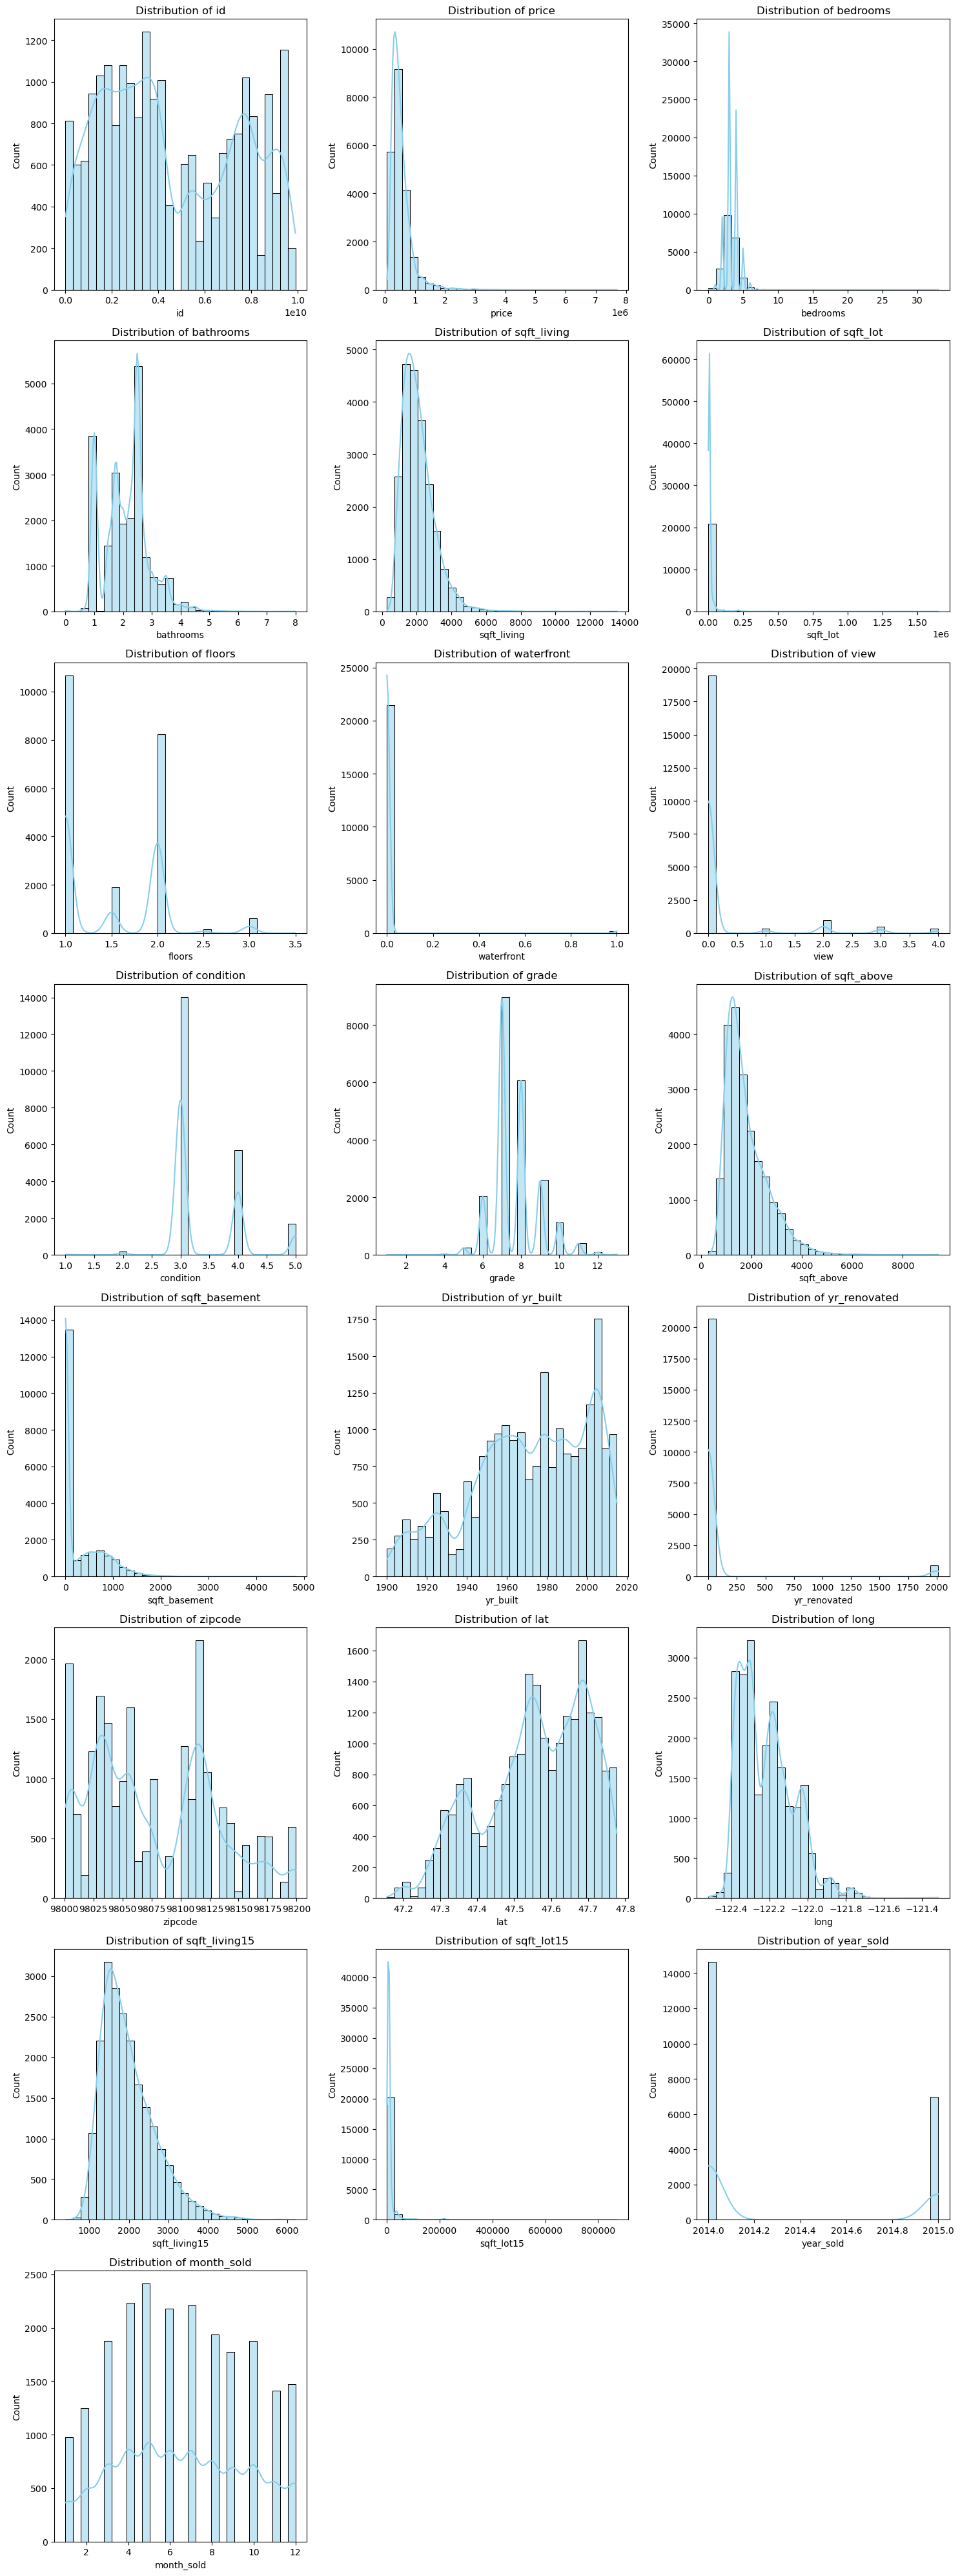

In [11]:
# Select numerical columns
numerical_features = df.select_dtypes(exclude='object')

# Count number of rows and columns
num_features = len(numerical_features.columns)
num_rows = math.ceil(num_features / 3)  # 3 columnas por fila

# Create histograms
plt.figure(figsize=(15, 5 * num_rows))  # Fit size automatically
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 1.2 Correlations
#### (HeatMap) With this we could know which colums are more related with price column

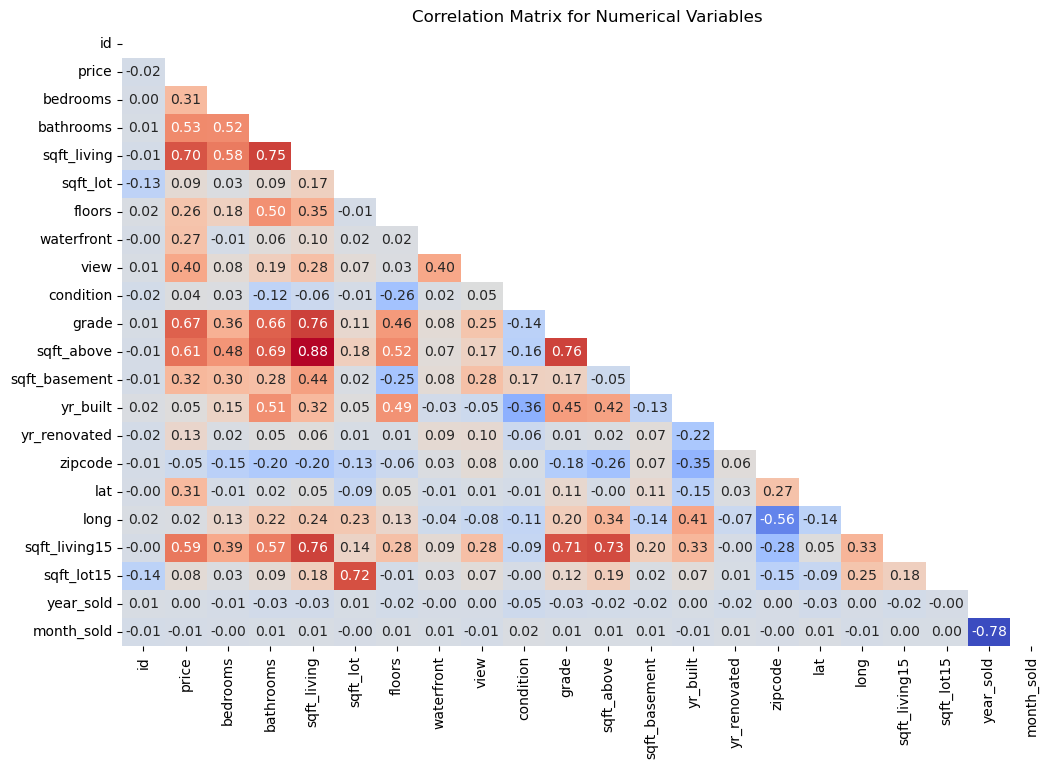

In [13]:
# Correlation matrix for numerical colums
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Optional, to hide repeat half of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0) 

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

#### (ScatterPlot) Now we know our more related columns, we'll see the top correlated columns with price using scaterr plots

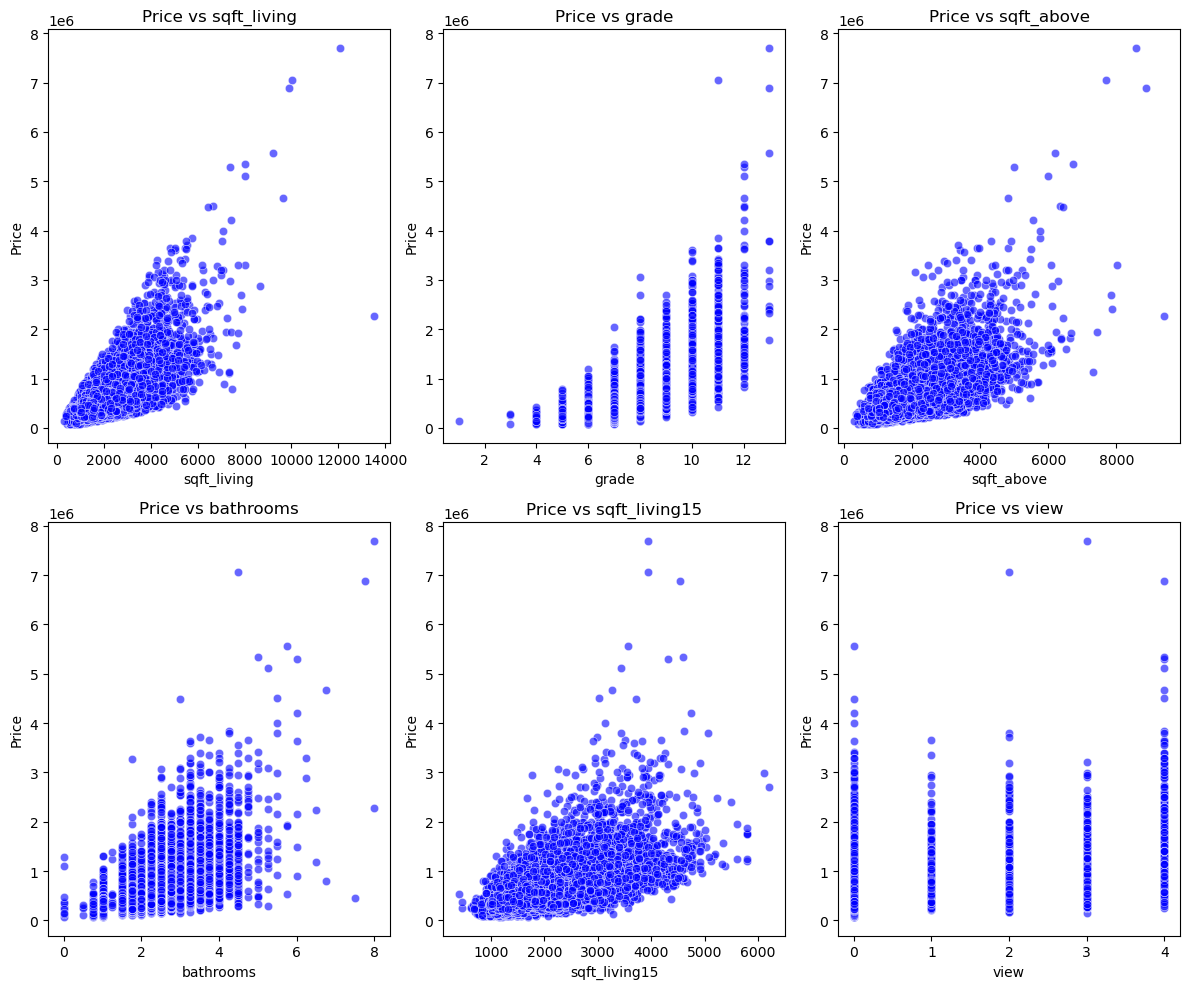

In [15]:
# More correlated variables with price in heatmap
top_correlated_vars = ['sqft_living', 'grade', 'sqft_above', "bathrooms","sqft_living15","view"]

# Create scatterplots
plt.figure(figsize=(12, 10))
for i, col in enumerate(top_correlated_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['price'], color='blue', alpha=0.6)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


### 1.3 Outlier Detection and Handling

#### 1.3.1 Visualizing Outliers

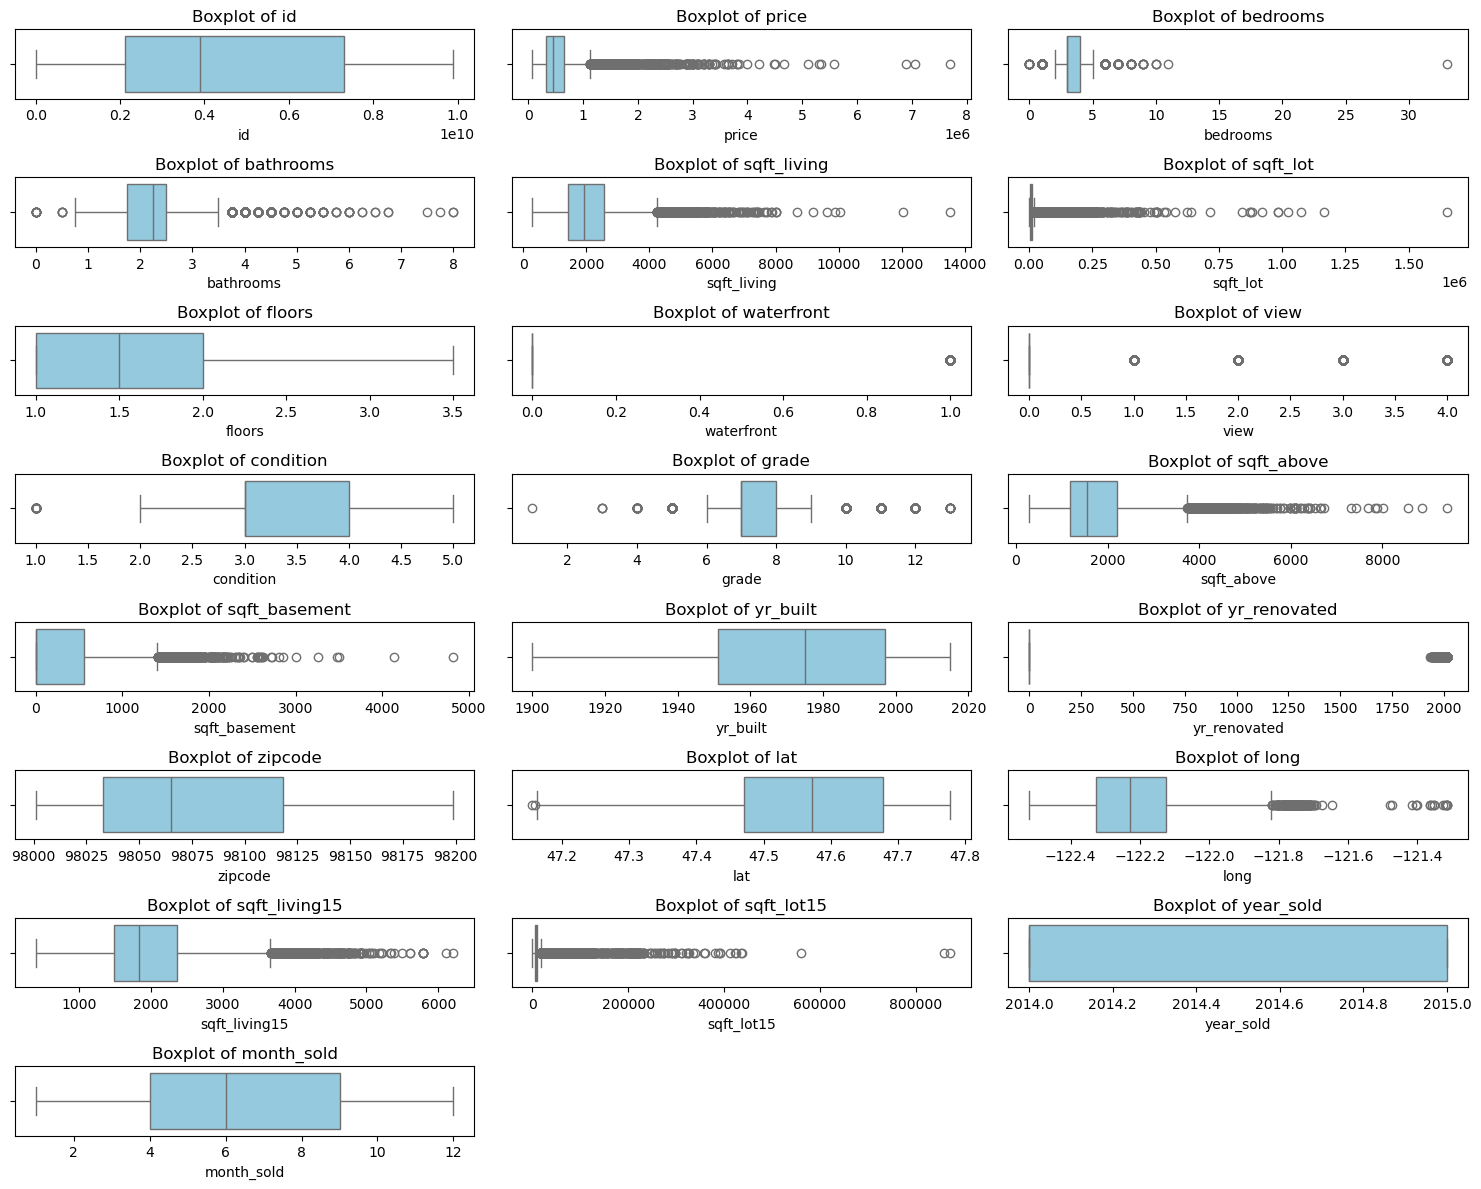

In [18]:
# Exclude the 'date' column from outlier analysis
numerical_features = df.select_dtypes(include=['number'])

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot((len(numerical_features.columns) + 2) // 3, 3, i)  # Adjust the grid dynamically
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<h3 style="color: white;">So far we have seen that there are columns with outliers and that it seems that there are columns that may not be useful for our model as they do not seem to be related to price, so we are going to create 3 more datasets.</h1>

<h3 style="color: white;">First the clean dataset without outliers, as we still have the one with outliers, then two more datasets eliminating columns we are not interested in to see if the model is better, one with outliers and one without.</h1>

### 1.4 Feature Engineering

In [21]:
# Dropping unnecessary columns
feature_data = df.copy() # Create new dataframe
feature_data = feature_data.drop(columns=['id','year_sold','month_sold'])

print("Removed columns succesfully")

Removed columns succesfully


### 1.5 Removing outliers

In [23]:
def remove_outliers(df):
    df = df.select_dtypes(include=['number'])
    for col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

cleaned_data_noOutliers = remove_outliers(df)
feature_data_noOutliers = remove_outliers(feature_data)

print("Removed outliers succesfully")

Removed outliers succesfully


### 1.6 Saving new data

In [25]:
cleaned_data_noOutliers.to_csv('cleaned_data_noOutliers.csv', index=False)
feature_data.to_csv('feature_data_house.csv', index=False)
feature_data_noOutliers.to_csv('feature_data_noOutliers.csv', index=False)
print("Data saved succesfully")

Data saved succesfully


In [26]:
cleaned_data_noOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13868 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13868 non-null  int64  
 1   price          13868 non-null  float64
 2   bedrooms       13868 non-null  int64  
 3   bathrooms      13868 non-null  float64
 4   sqft_living    13868 non-null  int64  
 5   sqft_lot       13868 non-null  int64  
 6   floors         13868 non-null  float64
 7   waterfront     13868 non-null  int64  
 8   view           13868 non-null  int64  
 9   condition      13868 non-null  int64  
 10  grade          13868 non-null  int64  
 11  sqft_above     13868 non-null  int64  
 12  sqft_basement  13868 non-null  int64  
 13  yr_built       13868 non-null  int64  
 14  yr_renovated   13868 non-null  int64  
 15  zipcode        13868 non-null  int64  
 16  lat            13868 non-null  float64
 17  long           13868 non-null  float64
 18  sqft_living